In [1]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
lh = pd.read_pickle('../data/counting.pkl')

In [3]:
len(lh['uid'].unique())

1017

In [4]:
################################
#                              #
#       Listening counts       #
#                              #
################################

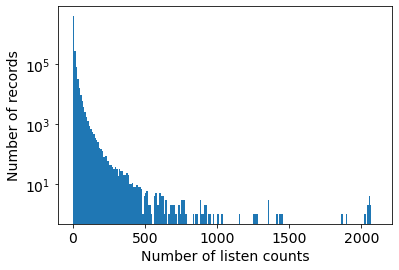

In [65]:
lh_list = lh['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh['count'].max()+1,10)]
plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_all.png', dpi=600)
plt.show()

In [66]:
lh_u_max = lh[lh['uid']==7]
lh_u_max = lh_u_max.sort_values(by='count', ascending='True')
lh_u_max[-5:]

,uid,tid,count
32932,7,29456,2059
32929,7,29453,2059
32933,7,29457,2065
32761,7,29285,2069
32931,7,29455,2119


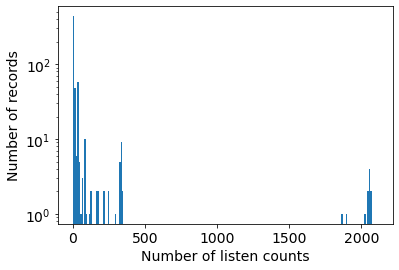

In [67]:
lh_list = lh_u_max['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh_u_max['count'].max()+1,10)]
n, bins, patches = plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_max_user.png', dpi=600)
plt.show()

In [102]:
lh_u_max_top_items = lh_u_max[lh_u_max['tid'].isin(top_items)]
len(lh_u_max_top_items), len(lh_u_max), len(lh_u_max_top_items)/len(lh_u_max)

(340, 608, 0.5592105263157895)

In [37]:
lh_user_scale = linear.groupby(["uid"]).sum().reset_index().sort_values(by='uid', ascending=False)
lh_user_scale

,uid,tid,rating,minmax,count
952,952,198498217,9273.75,1417.946429,15881
951,951,73312423,4885.25,555.239130,25541
950,950,193906535,11723.25,2230.277778,32116
949,949,30541744,1473.50,58.769772,6688
948,948,10598299,1001.25,125.160428,4681
...,...,...,...,...,...
4,4,13160130,2629.25,298.619910,13199
3,3,52126190,9512.75,245.146104,15101
2,2,30544662,8378.25,1733.723404,16297
1,1,30645660,15564.00,1845.359712,51301


In [113]:
y = sorted(lh_user_scale['count'].tolist(), reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(953, 953)

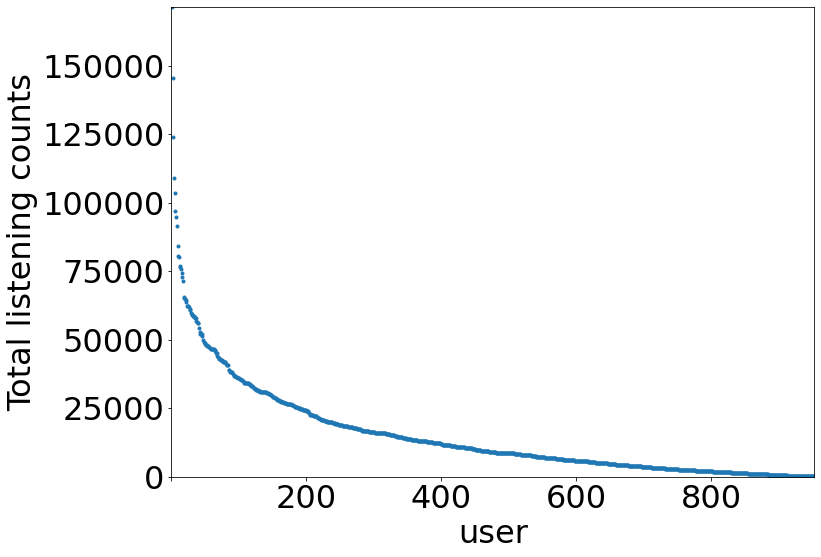

In [114]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
# plt.yscale('log')
plt.xlim(0, max(x))
plt.ylim(0, max(y))

plt.scatter(x, y, marker='.') 
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)


#視覺化標題跟xy軸名稱
plt.xlabel('user')
plt.ylabel('Total listening counts')
# plt.savefig('./dv_pop_bias.png', dpi=600)
#出圖
plt.show()

In [7]:
#################################
#                               #
#       Popularity-bias         #
#                               #
#################################

In [47]:
dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'
linear = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
len(linear)

3079638

In [48]:
dir_ = '../data/'
file_name = 'normalized_popularity_filter_track_5_user_100.csv'
pop_count = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
pop_count = pop_count.sort_values(by='count', ascending=False)
len(pop_count)

157567

In [49]:
lh_pop = lh.groupby(["tid"]).sum().reset_index().sort_values(by='count', ascending=False)

In [116]:
y = sorted(lh_pop['count'].tolist()[3:], reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(1083485, 1083485)

/home/han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


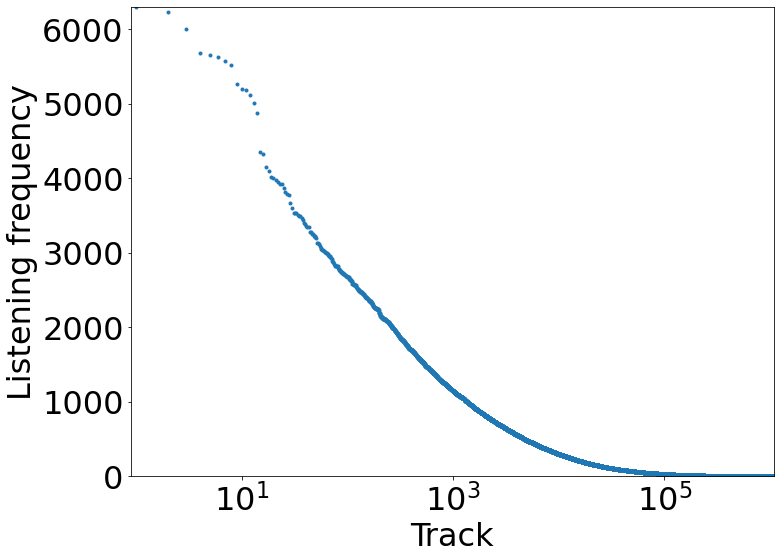

In [117]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)


#視覺化標題跟xy軸名稱
plt.xlabel('Track')
plt.ylabel('Listening frequency')
plt.savefig('./dv_pop_bias.png', dpi=600)
#出圖
plt.show()

In [96]:
top_items = lh_pop[:int(len(lh_pop)/20)]
len(top_items)

54174

In [97]:
top_items

,tid,uid,count
153,153,389472,17561
2287,2287,231211,6926
198,198,267455,6586
18382,18382,271927,6304
1976,1976,240431,6234
...,...,...,...
257499,257499,3018,63
188718,188718,1193,63
70524,70524,2112,63
483603,483603,4156,63


In [98]:
top_items = top_items['tid'].tolist()
linear_top_items = linear[linear['tid'].isin(top_items)]
len(linear_top_items)

1057076

In [99]:
pop_ratio = []
for u in linear['uid'].unique():
    pop_ratio.append(len(linear_top_items[linear_top_items['uid']==u])/len(linear[linear['uid']==u]))

In [110]:
# original data 
y = sorted(pop_ratio, reverse = False)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(953, 953)

In [111]:
y

[0.2237960339943343,
 0.24,
 0.2454160789844852,
 0.25092250922509224,
 0.2552702184745113,
 0.26238927459899447,
 0.26323218066337334,
 0.26527050610820246,
 0.2653455775737071,
 0.2692307692307692,
 0.2730560578661845,
 0.2753838533927687,
 0.27736916548797735,
 0.2777777777777778,
 0.277992277992278,
 0.2784090909090909,
 0.28005865102639294,
 0.2800925925925926,
 0.2801358234295416,
 0.28040540540540543,
 0.2806754221388368,
 0.2815533980582524,
 0.2816629068643248,
 0.2822410147991543,
 0.2827914798206278,
 0.2831275720164609,
 0.2835332606324973,
 0.2837022132796781,
 0.28420705572040883,
 0.28470906630581866,
 0.2857142857142857,
 0.28627450980392155,
 0.2865135453474676,
 0.28661087866108786,
 0.2867198498357579,
 0.2868217054263566,
 0.2881944444444444,
 0.2905368013281682,
 0.2908366533864542,
 0.2908789636213,
 0.2909516380655226,
 0.29118773946360155,
 0.291638007271298,
 0.29191716766867065,
 0.29195289499509325,
 0.2921005842011684,
 0.2924970691676436,
 0.292628774422735

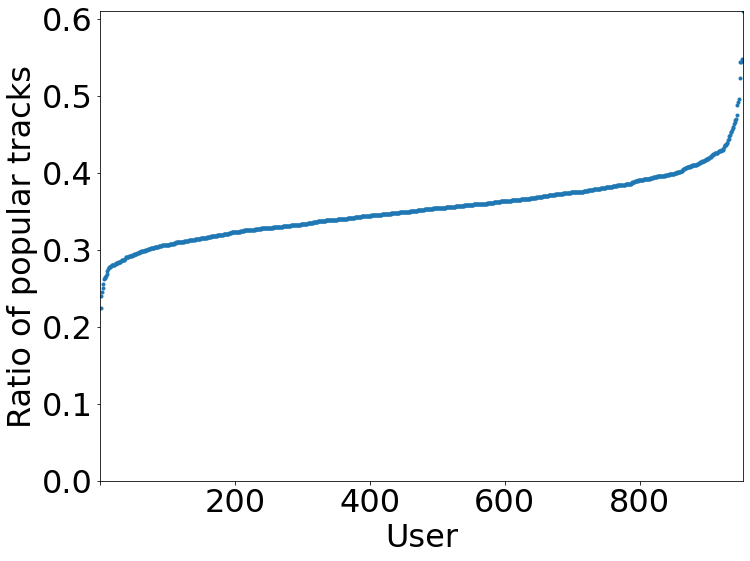

In [112]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 

plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

#視覺化標題跟xy軸名稱
plt.xlabel('User')
plt.ylabel('Ratio of popular tracks')

# plt.savefig('./dv_pop_compare.png', dpi=600)
#出圖
plt.show()

In [21]:
# original data 
y = sorted(pop_ratio, reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(953, 953)

In [ ]:
#################################
#                               #
#     Rating Normalization      #
#                               #
#################################

In [21]:
dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'
linear = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
linear

,uid,tid,rating,minmax,count
10,0,0,5.00,1.928571,27
17,0,1,3.75,0.500000,7
18,0,2,4.00,0.571429,8
20,0,3,4.00,0.571429,8
21,0,4,3.75,0.500000,7
...,...,...,...,...,...
4407426,952,157281,0.25,0.089286,1
4407447,952,157461,1.75,0.178571,2
4407453,952,157465,3.25,0.357143,4
4407473,952,157517,4.25,0.625000,7


In [22]:
v = linear['rating'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

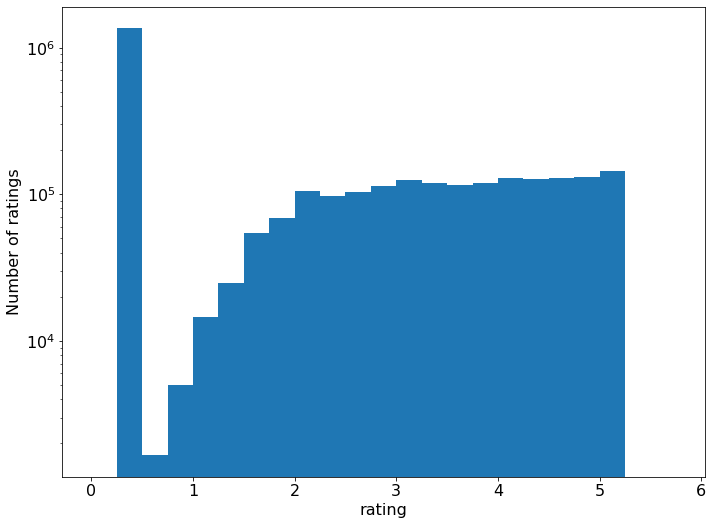

In [23]:
fig_x=1.8
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_linear.png', dpi=600)
plt.show()

In [24]:
dir_ = '../data/'
file_name = 'normalized_log_filter_track_5_user_100.csv'
log = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
log

,uid,tid,rating,count
10,0,0,1.447158,27
17,0,1,0.903090,7
18,0,2,0.954243,8
20,0,3,0.954243,8
21,0,4,0.903090,7
...,...,...,...,...
4407426,952,157281,0.301030,1
4407447,952,157461,0.477121,2
4407453,952,157465,0.698970,4
4407473,952,157517,0.903090,7


In [25]:
v = log['rating'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

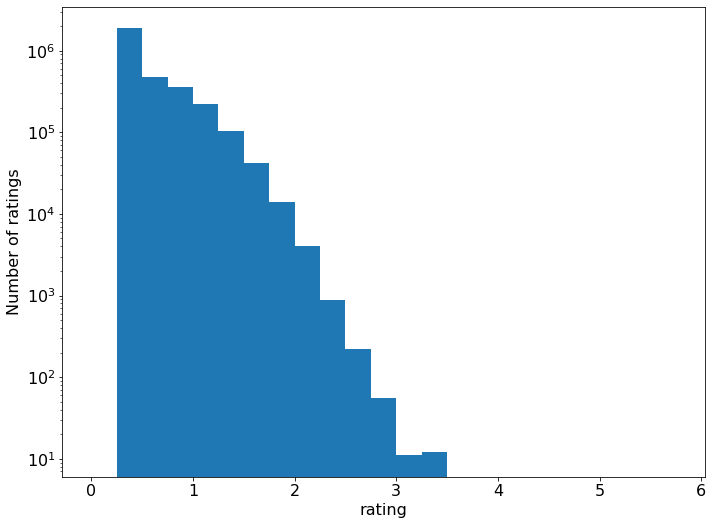

In [26]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_log.png', dpi=600)
plt.show()

In [27]:
dir_ = '../data/'
file_name = 'normalized_minmax_filter_track_5_user_100.csv'
minmax = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
minmax

,uid,tid,rating
10,0,0,1.928571
17,0,1,0.500000
18,0,2,0.571429
20,0,3,0.571429
21,0,4,0.500000
...,...,...,...
4407426,952,157281,0.089286
4407447,952,157461,0.178571
4407453,952,157465,0.357143
4407473,952,157517,0.625000


In [30]:
v = minmax['rating'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

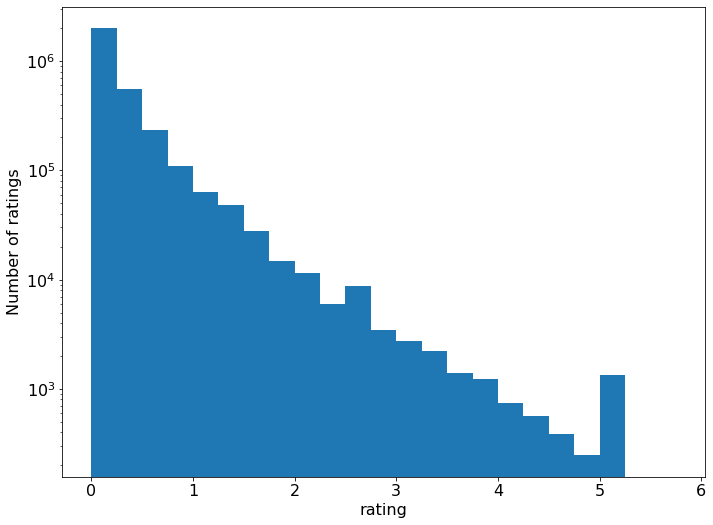

In [31]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_minmax.png', dpi=600)
plt.show()

In [ ]:
#################################
#                               #
#       Pop. Normalization      #
#                               #
#################################

In [9]:
# POP form listening users
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(len(lh[lh['tid']==i]))
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_u = pd.DataFrame(data=d)
df_pop_u = df_pop_u.sort_values(by=['rating'], ascending=False)
df_pop_u[:10]

,tid,rating
153,153,773
8087,8087,555
833,833,539
4308,4308,535
198,198,534
18382,18382,534
466,466,512
8296,8296,511
2164,2164,486
2931,2931,483


In [10]:
lh_list_u = df_pop_u['rating'].values.tolist()
bins_u = [i for i in range(0,df_pop_u['rating'].max()+1,1)]

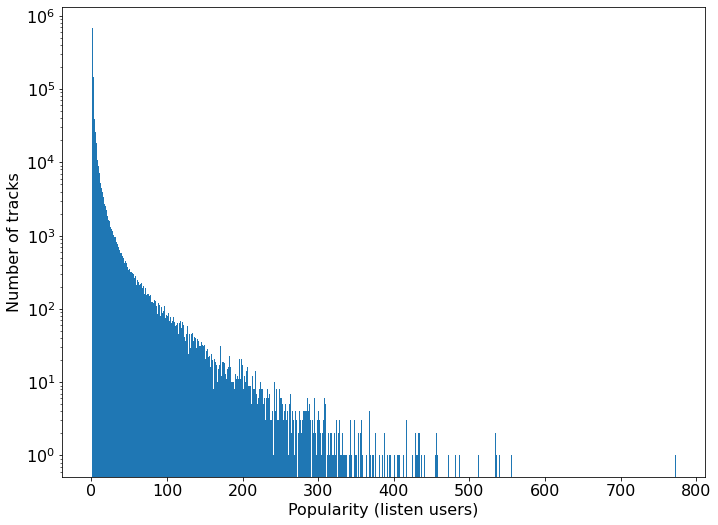

In [11]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_u, bins=bins_u)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen users)')
plt.savefig('./dv_pop_user.png', dpi=600)
plt.show()

In [12]:
# POP form listening counts
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(lh[lh['tid']==i].sum()['count'])
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_c = pd.DataFrame(data=d)
df_pop_c = df_pop_c.sort_values(by=['rating'], ascending=False)
df_pop_c[:10]

,tid,rating
153,153,17561
2287,2287,6926
198,198,6586
18382,18382,6304
1976,1976,6234
4308,4308,6002
6121,6121,5676
8087,8087,5658
5984,5984,5627
3943,3943,5571


In [13]:
lh_list_c = df_pop_c['rating'].values.tolist()
bins_c = [i for i in range(0,df_pop_c['rating'].max()+1000,1)]

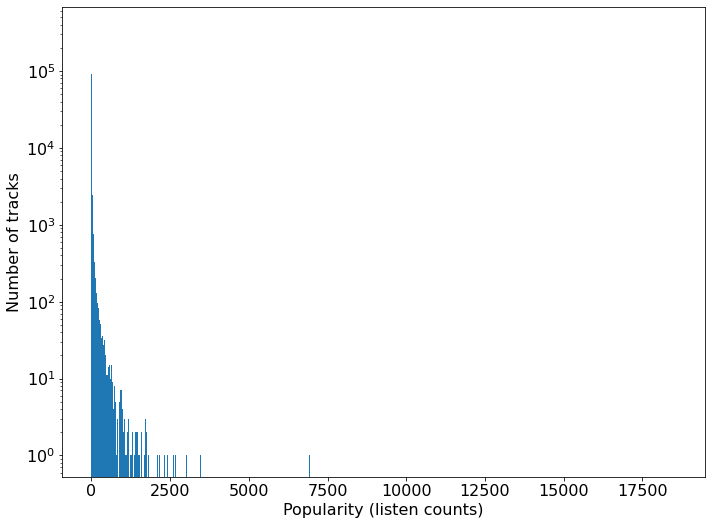

In [14]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_c, bins=bins_c)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen counts)')
plt.savefig('./dv_pop_count.png', dpi=600)
plt.show()

In [117]:
df_pop_u = df_pop_u.sort_values(by=['tid'], ascending=False)
df_pop_c = df_pop_c.sort_values(by=['tid'], ascending=False)

In [116]:
df_pop_u['r'] = df_pop_u['rating']/len(lh['uid'].unique())
df_pop_u

,tid,rating,r
1083487,1083487,1,0.000983
1083486,1083486,1,0.000983
1083485,1083485,1,0.000983
1083484,1083484,1,0.000983
1083483,1083483,1,0.000983
...,...,...,...
4,4,1,0.000983
3,3,1,0.000983
2,2,1,0.000983
1,1,1,0.000983


In [119]:
df_pop_c['r'] = df_pop_c['rating']/sum(df_pop_c['rating'])
df_pop_c

,tid,rating,r
1083487,1083487,1,5.235917e-08
1083486,1083486,1,5.235917e-08
1083485,1083485,1,5.235917e-08
1083484,1083484,1,5.235917e-08
1083483,1083483,1,5.235917e-08
...,...,...,...
4,4,15,7.853876e-07
3,3,13,6.806693e-07
2,2,12,6.283101e-07
1,1,16,8.377468e-07


/home/han/anaconda3/envs/fm/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


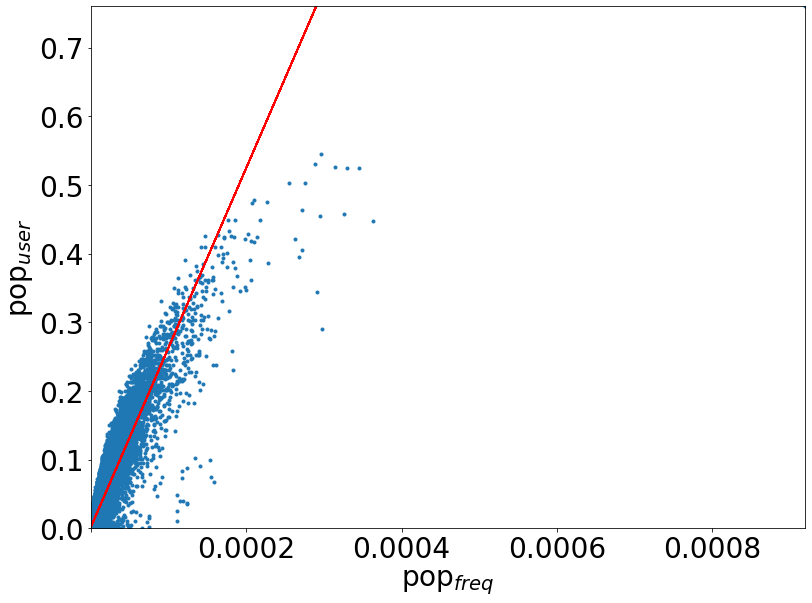

0.9112961477887136

In [135]:
fig_x = 2
x = df_pop_c['r'].values.tolist()
y = df_pop_u['r'].values.tolist()
#設定大小跟x軸兩端的值
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 

pearR = np.corrcoef(x,y)[1,0]
A = np.vstack([x,np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,np.array(y))[0]
x_ = np.array(x)*m+c
plt.plot(x,x_,color='r')

plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

#視覺化標題跟xy軸名稱
plt.xlabel('pop$_{freq}$')
plt.ylabel('pop$_{user}$')
plt.savefig('./dv_pop_compare.png', dpi=600)
#出圖
plt.show()
pearR